<a href="https://colab.research.google.com/github/Bryan-PORTAILL/FCC-ML-Certification-Linear-Regression-Health-Costs-Calculator/blob/main/FCC%20-%20ML%20Certification%20-%20Linear%20Regression%20Health%20Costs%20Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



This is my solution to the FreeCodeCamp Machine Learning Certification project  Predict health costs with regression.

I took the liberty of modifying a few things (such as some variable names) to make the project clearer to read.

The first cell imports all the utilities we will need to create a regression algorithm able to predict healthcare costs.

In [ ]:
# 1

import matplotlib.pyplot
import numpy
import pandas

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Normalization, Input, Dense
from keras.optimizers import Adam
from keras.losses import MeanAbsoluteError

The second cell imports our data and turns it into a dataframe. We also make a copy of it to preserve the original.

In [ ]:
# 2

!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv

healthcare_costs_table = pandas.read_csv('insurance.csv')

healthcare_costs_table_for_processing = healthcare_costs_table.copy()

--2024-05-18 16:46:18--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.02s   

2024-05-18 16:46:18 (2.90 MB/s) - ‘insurance.csv’ saved [50264/50264]



*Below is what our data looks like :*

In [ ]:
healthcare_costs_table

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


The third cell is where we format our data in a way that the model can use to learn. Specifically, we take any non numeric values and convert them to numeric values.

In [ ]:
# 3

for value in ['sex', 'smoker', 'region']:
  healthcare_costs_table_for_processing[value] = healthcare_costs_table[value].astype('category').cat.codes

*Here is what it looks like afterwards :*

In [ ]:
healthcare_costs_table_for_processing

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


We then separate the data into two sets : one for training, one for testing. This is done in cell 4.

In [ ]:
# 4

train_dataset, test_dataset = train_test_split(healthcare_costs_table_for_processing, test_size = 0.2, shuffle = True)

We also create the datasets used for predictions in cell 5.

In [ ]:
# 5

train_labels, test_labels = train_dataset.pop('expenses'), test_dataset.pop('expenses')

Cell 6 is a few useful variables.

In [ ]:
# 6

train_dataset_length = len(train_dataset.keys())
batch_size = 10
epochs = 100

Cell 7 is where we build the algorithm...

In [ ]:
# 7

model = Sequential([
    Input((train_dataset_length, )),
    Normalization(),
    Dense(128, activation = "relu"),
    Dense(128, activation = "relu"),
    Dense(128, activation = "relu"),
    Dense(128, activation = "relu"),
    Dense(1)])

model.compile(
    Adam(),
    MeanAbsoluteError(),
    ['mae', 'mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 6)                 13        
 on)                                                             
                                                                 
 dense (Dense)               (None, 128)               896       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                        

... that we then train in cell 8.

In [ ]:
# 8

model.fit(
    train_dataset,
    train_labels,
    batch_size = batch_size,
    epochs = epochs,
    validation_split = 0.2)

Epoch 1/100
86/86 [==============================] - 4s 12ms/step - loss: 10799.8369 - mae: 10799.8369 - mse: 257596688.0000 - val_loss: 6810.5562 - val_mae: 6810.5562 - val_mse: 133387616.0000
Epoch 2/100
86/86 [==============================] - 1s 11ms/step - loss: 7680.9048 - mae: 7680.9048 - mse: 171931136.0000 - val_loss: 6589.2148 - val_mae: 6589.2148 - val_mse: 136444928.0000
Epoch 3/100
86/86 [==============================] - 0s 4ms/step - loss: 7301.3281 - mae: 7301.3281 - mse: 175030352.0000 - val_loss: 6271.7373 - val_mae: 6271.7373 - val_mse: 128412688.0000
Epoch 4/100
86/86 [==============================] - 0s 3ms/step - loss: 7083.1807 - mae: 7083.1812 - mse: 177948576.0000 - val_loss: 6203.8740 - val_mae: 6203.8740 - val_mse: 140182416.0000
Epoch 5/100
86/86 [==============================] - 0s 3ms/step - loss: 7019.9189 - mae: 7019.9189 - mse: 177958656.0000 - val_loss: 6137.8745 - val_mae: 6137.8740 - val_mse: 138757040.0000
Epoch 6/100
86/86 [======================

Cell 9 is the final cell, containing the test module with an expected accuracy of at least 3 500 USD.

9/9 - 0s - loss: 2100.6062 - mae: 2100.6062 - mse: 27754070.0000 - 33ms/epoch - 4ms/step
Testing set Mean Abs Error: 2100.61 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


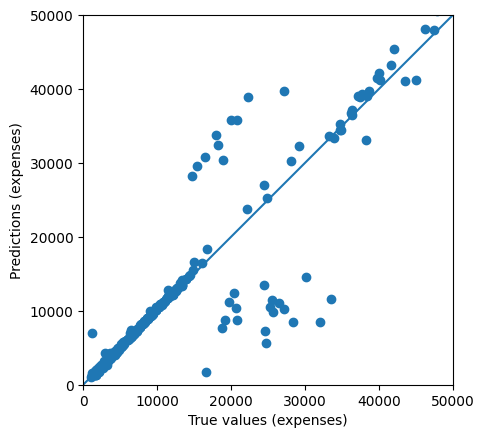

In [ ]:
# 9

# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = matplotlib.pyplot.axes(aspect='equal')
matplotlib.pyplot.scatter(test_labels, test_predictions)
matplotlib.pyplot.xlabel('True values (expenses)')
matplotlib.pyplot.ylabel('Predictions (expenses)')
lims = [0, 50000]
matplotlib.pyplot.xlim(lims)
matplotlib.pyplot.ylim(lims)
_ = matplotlib.pyplot.plot(lims,lims)
